In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_train=pd.read_csv("/content/train.csv")
df_test=pd.read_csv("/content/test.csv")

In [ ]:
df_train.head()

,Id,Date,Open,High,Low,Close,Adj Close,Volume,Company
0,0,2033-03-01,159.271109,167.221488,157.380478,161.915062,160.167043,40490589,Company_0
1,1,2033-03-01,114.571843,114.409664,112.921505,113.066659,87.844722,8592865,Company_1
2,2,2033-03-01,50.984499,51.262529,50.266272,50.094499,49.329834,25085661,Company_2
3,3,2033-03-01,98.585428,99.988079,97.867719,98.811966,91.784469,823271,Company_3
4,4,2033-03-01,8874.646107,8935.704765,8811.247764,8873.173069,8407.389386,609369,Company_4


In [ ]:
df_train.describe

<bound method NDFrame.describe of         Id        Date         Open         High          Low        Close  \
0        0  2033-03-01   159.271109   167.221488   157.380478   161.915062   
1        1  2033-03-01   114.571843   114.409664   112.921505   113.066659   
2        2  2033-03-01    50.984499    51.262529    50.266272    50.094499   
3        3  2033-03-01    98.585428    99.988079    97.867719    98.811966   
4        4  2033-03-01  8874.646107  8935.704765  8811.247764  8873.173069   
...    ...         ...          ...          ...          ...          ...   
7411  7411  2038-02-28   104.074758   104.325097   102.299154   102.070115   
7412  7412  2038-02-28     6.825210     7.378966     6.536319     6.484569   
7413  7413  2038-02-28    96.702497   102.527327    96.123058   101.977618   
7414  7414  2038-02-28  8650.533559  8709.103373  8604.908934  8623.897896   
7415  7415  2038-02-28   172.287522   172.895417   169.820142   170.720189   

        Adj Close    Volume    Company  
0      160.167043  40490589  Company_0  
1       87.844722   8592865  Company_1  
2       49.329834  25085661  Company_2  
3       91.784469    823271  Company_3  
4     8407.389386    609369  Company_4  
...           ...       ...        ...  
7411    95.938421  17617907  Company_1  
7412     6.664250  67725048  Company_2  
7413   100.731773   5257824  Company_3  
7414  8543.781858    370998  Company_4  
7415   164.854829  19044910  Company_5  

[7416 rows x 9 columns]>

In [ ]:
df_train.shape

(7416, 9)

In [ ]:
companies = ["Company_0", "Company_1", "Company_2", "Company_3", "Company_4", "Company_5"]
cnt=0
for i in range(7416):
  k=df_train.loc[i,'Company']==companies[i%6]
  if k==True:
    cnt+=1
cnt

7416

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7416 entries, 0 to 7415
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         7416 non-null   int64  
 1   Date       7416 non-null   object 
 2   Open       7416 non-null   float64
 3   High       7416 non-null   float64
 4   Low        7416 non-null   float64
 5   Close      7416 non-null   float64
 6   Adj Close  7416 non-null   float64
 7   Volume     7416 non-null   int64  
 8   Company    7416 non-null   object 
dtypes: float64(5), int64(2), object(2)
memory usage: 521.6+ KB


In [ ]:
df_pivot = df_train.pivot(index='Date', columns='Company', values=['Open', 'High', 'Low', 'Volume','Adj Close','Id'])

df_pivot.columns = ['_'.join(col).strip() for col in df_pivot.columns.values]

df_pivot.reset_index(inplace=True)

df_pivot.head()

,Date,Open_Company_0,Open_Company_1,Open_Company_2,Open_Company_3,Open_Company_4,Open_Company_5,High_Company_0,High_Company_1,High_Company_2,...,Adj Close_Company_2,Adj Close_Company_3,Adj Close_Company_4,Adj Close_Company_5,Id_Company_0,Id_Company_1,Id_Company_2,Id_Company_3,Id_Company_4,Id_Company_5
0,2033-03-01,159.271109,114.571843,50.984499,98.585428,8874.646107,136.430652,167.221488,114.409664,51.262529,...,49.329834,91.784469,8407.389386,105.356425,0.0,1.0,2.0,3.0,4.0,5.0
1,2033-03-05,158.049337,113.266631,50.534860,99.338531,8867.074823,135.100632,167.347904,113.161314,49.383999,...,49.927823,89.513635,8333.361605,105.455415,6.0,7.0,8.0,9.0,10.0,11.0
2,2033-03-06,163.686732,110.756424,49.838053,97.339020,8855.832360,137.119321,167.057890,112.339453,50.240192,...,49.937149,86.676999,8163.464754,105.169763,12.0,13.0,14.0,15.0,16.0,17.0
3,2033-03-07,160.461622,109.827335,49.242896,93.144173,8621.791003,135.576175,161.422258,111.136768,49.930463,...,47.539717,84.275840,8223.307353,104.904857,18.0,19.0,20.0,21.0,22.0,23.0
4,2033-03-08,150.289989,111.168595,48.728623,90.821417,8699.274117,136.789364,154.889808,111.415207,49.391428,...,47.622623,84.868218,8270.636561,106.500629,24.0,25.0,26.0,27.0,28.0,29.0


In [ ]:
df_closing = df_train.pivot(index='Date', columns='Company', values=['Close'])

df_closing.columns = ['_'.join(col).strip() for col in df_closing.columns.values]

df_closing.reset_index(inplace=True)

df_closing.head()

,Date,Close_Company_0,Close_Company_1,Close_Company_2,Close_Company_3,Close_Company_4,Close_Company_5
0,2033-03-01,161.915062,113.066659,50.094499,98.811966,8873.173069,135.882546
1,2033-03-05,163.108507,110.561246,49.250071,96.594597,8794.758109,135.970813
2,2033-03-06,161.716298,109.651386,48.878616,93.602065,8616.178598,136.070561
3,2033-03-07,148.051907,109.723772,48.670564,90.718080,8679.165970,135.772818
4,2033-03-08,148.483368,109.118052,47.642654,90.771456,8729.613528,137.854360


In [ ]:
print(df_pivot.shape,df_closing.shape)

(1236, 37) (1236, 7)


In [ ]:
for i in range(1,31):
  df_pivot[df_pivot.columns[i]].fillna(df_pivot[df_pivot.columns[i]].mean(),inplace=True)
for i in range(1,7):
  df_closing[df_closing.columns[i]].fillna(df_closing[df_closing.columns[i]].mean(),inplace=True)

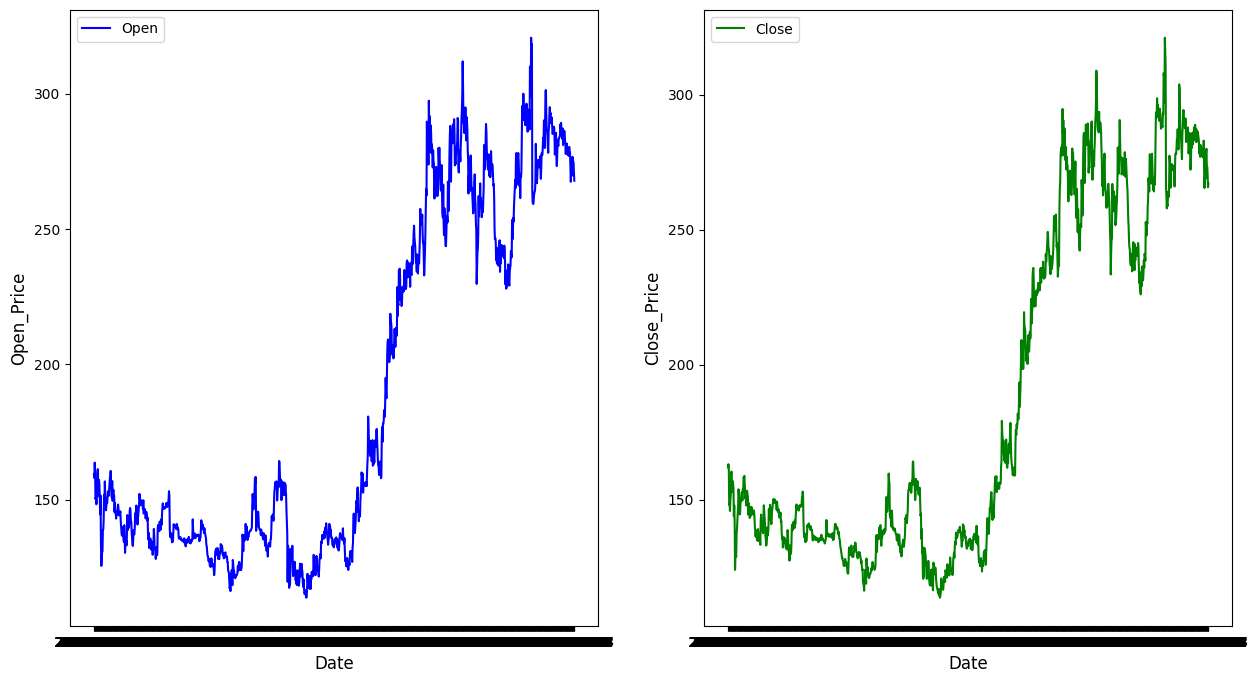

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.plot(df_pivot['Date'],df_pivot['Open_Company_0'],label='Open',color='blue')
plt.xlabel('Date',size=12)
plt.ylabel('Open_Price',size=12)
plt.legend()

plt.subplot(1,2,2)
plt.plot(df_closing['Date'],df_closing['Close_Company_0'],label='Close',color='green')
plt.xlabel('Date',size=12)
plt.ylabel('Close_Price',size=12)
plt.legend()

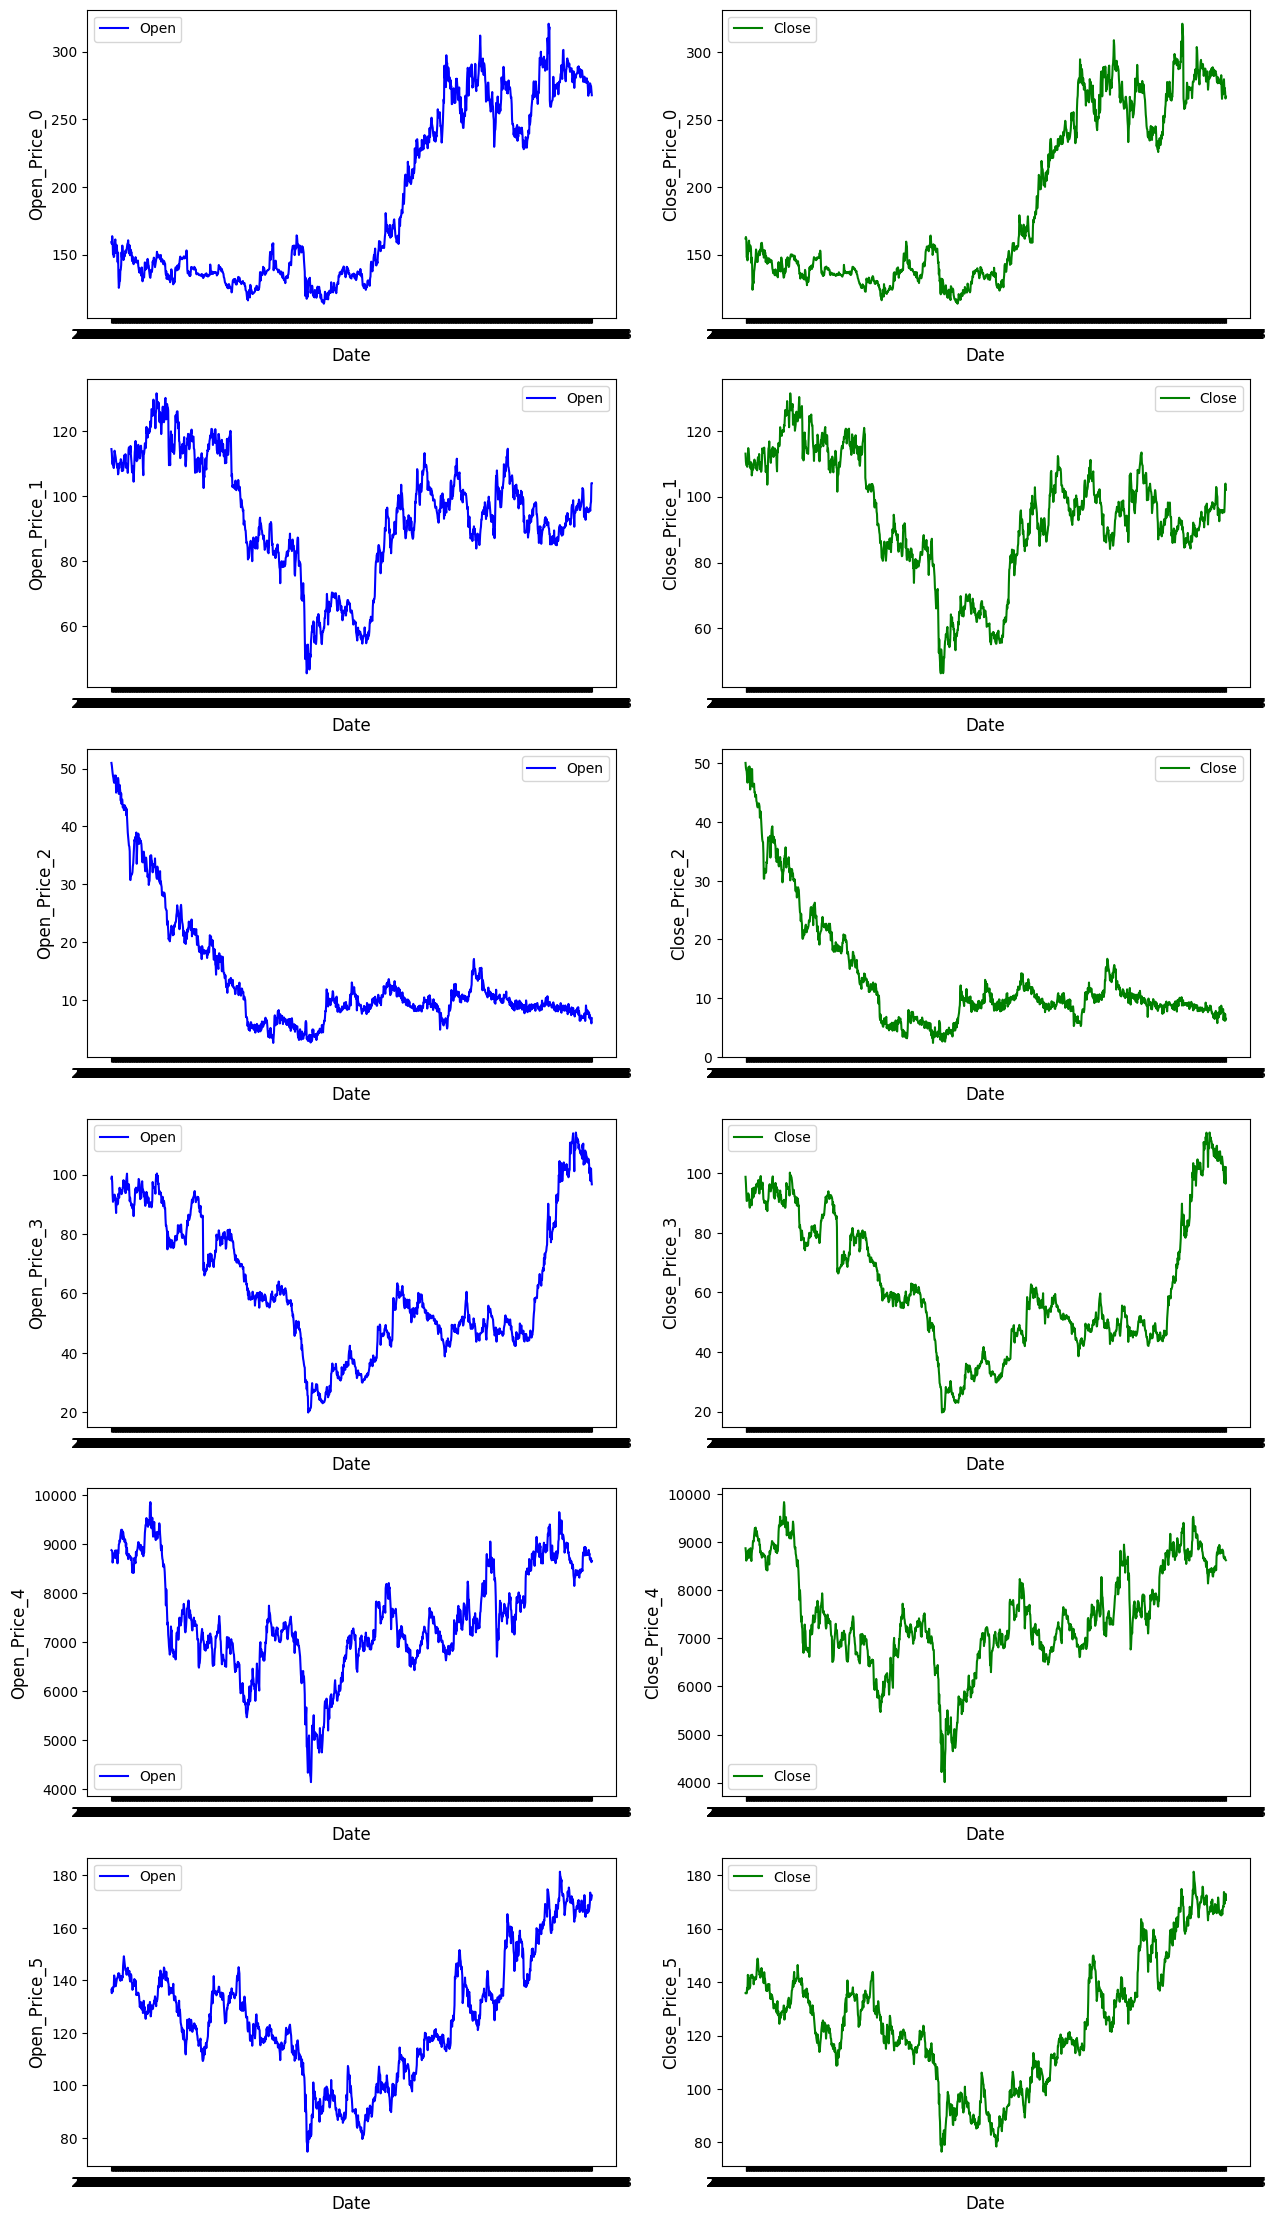

In [ ]:
plt.figure(figsize=(15, 28))
for i in range(6):
    # Plot opening price
    plt.subplot(6, 2, 2 * i + 1)
    plt.plot(df_pivot['Date'], df_pivot['Open_Company_' + str(i)], label='Open', color='blue')
    plt.xlabel('Date', size=12)
    plt.ylabel('Open_Price_'+ str(i), size=12)
    plt.legend()

    # Plot closing price
    plt.subplot(6, 2, 2 * i + 2)
    plt.plot(df_closing['Date'], df_closing['Close_Company_' + str(i)], label='Close', color='green')
    plt.xlabel('Date', size=12)
    plt.ylabel('Close_Price_'+ str(i), size=12)
    plt.legend()
plt.show()


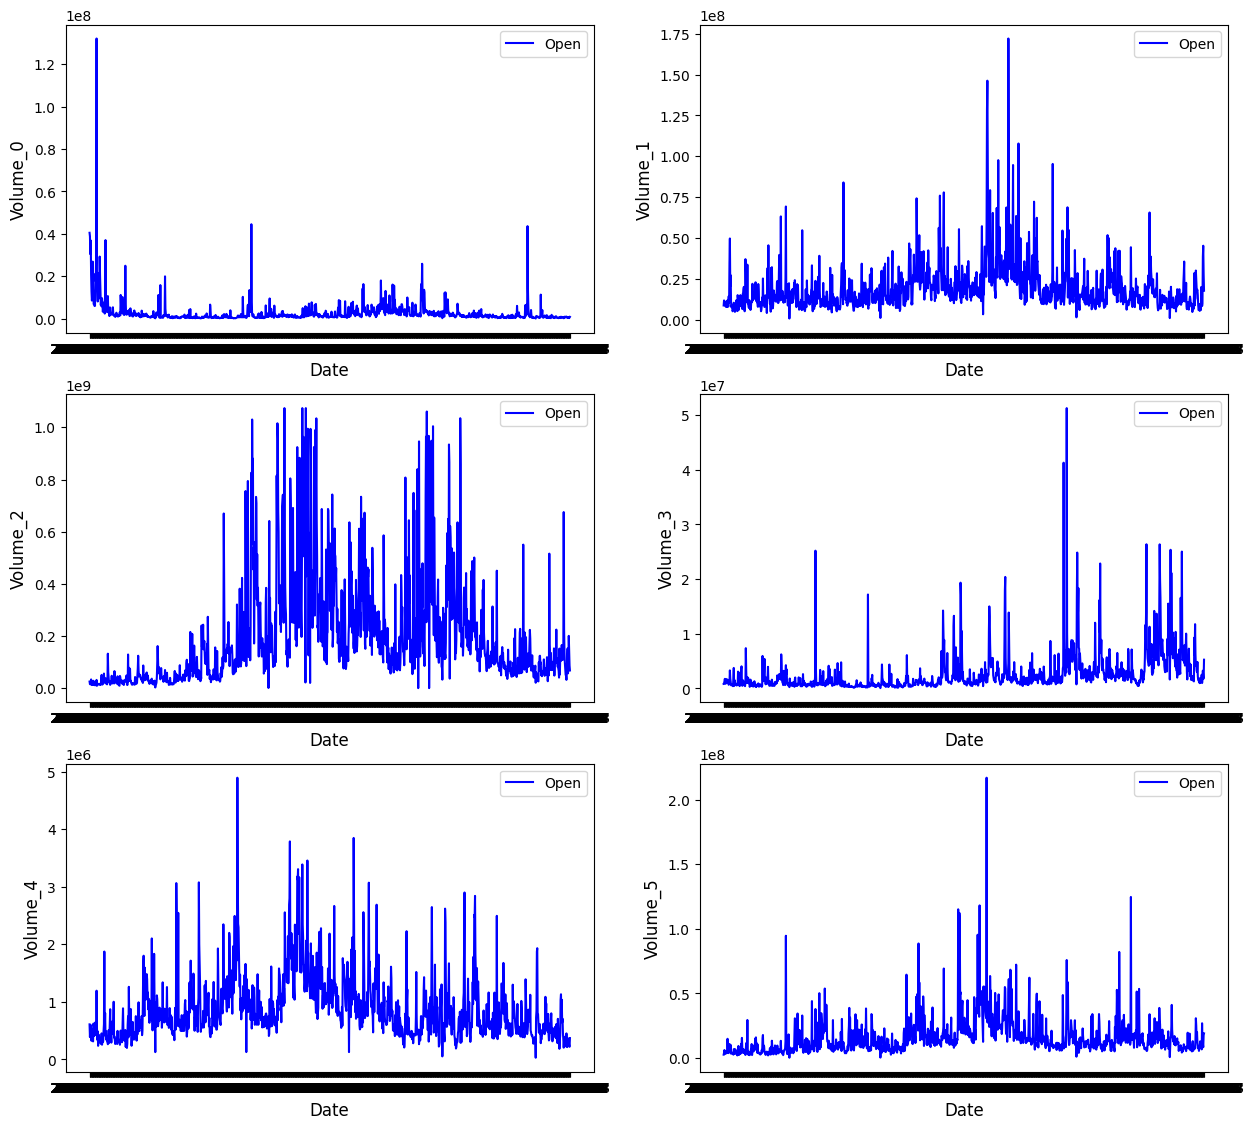

In [ ]:
plt.figure(figsize=(15, 28))
for i in range(0,6):
    plt.subplot(6, 2, i+1)
    plt.plot(df_pivot['Date'], df_pivot['Volume_Company_' + str(i)], label='Open', color='blue')
    plt.xlabel('Date', size=12)
    plt.ylabel('Volume_'+ str(i), size=12)
    plt.legend()

In [ ]:
companies = ["Company_0", "Company_1", "Company_2", "Company_3", "Company_4", "Company_5"]
columns = ['Open', 'High', 'Low', 'Volume','Adj Close']
company_dataframes = {}

for i, company_name in enumerate(companies):
    selected_columns = ['Date'] + [f'{column}_Company_{i}' for column in columns]
    company_df = df_pivot[selected_columns].copy()                       # Create a new DataFrame with selected columns
    company_df[f'Close'] = df_closing[f'Close_Company_{i}']              # Add closing prices as a new column
    company_df.columns = ['Date', 'Open', 'High', 'Low', 'Volume', 'Adj Close', 'Close']
    company_dataframes[company_name] = company_df

company_dataframes["Company_0"].head()

,Date,Open,High,Low,Volume,Adj Close,Close
0,2033-03-01,159.271109,167.221488,157.380478,40490589.0,160.167043,161.915062
1,2033-03-05,158.049337,167.347904,152.216604,38792259.0,162.822481,163.108507
2,2033-03-06,163.686732,167.057890,158.434401,30423475.0,161.443814,161.716298
3,2033-03-07,160.461622,161.422258,145.216158,36866132.0,147.522450,148.051907
4,2033-03-08,150.289989,154.889808,146.911183,20664624.0,147.558481,148.483368


In [ ]:
company_dataframes["Company_3"].describe()

,Open,High,Low,Volume,Adj Close,Close
count,1236.000000,1236.000000,1236.000000,1.236000e+03,1236.000000,1236.000000
mean,62.615523,63.727955,61.389909,2.693917e+06,59.134074,62.444512
std,22.732329,23.054738,22.453612,3.828854e+06,21.854233,22.757490
min,19.974902,20.548140,18.743017,5.936000e+04,18.434763,19.697281
25%,46.474547,47.117738,45.378481,7.405195e+05,43.934195,46.284757
50%,57.512330,58.418932,56.259219,1.504272e+06,53.809813,57.087407
75%,80.729376,82.064003,79.494714,3.006452e+06,75.789164,80.529996
max,114.122470,115.563614,112.125641,5.126626e+07,112.084676,113.678904


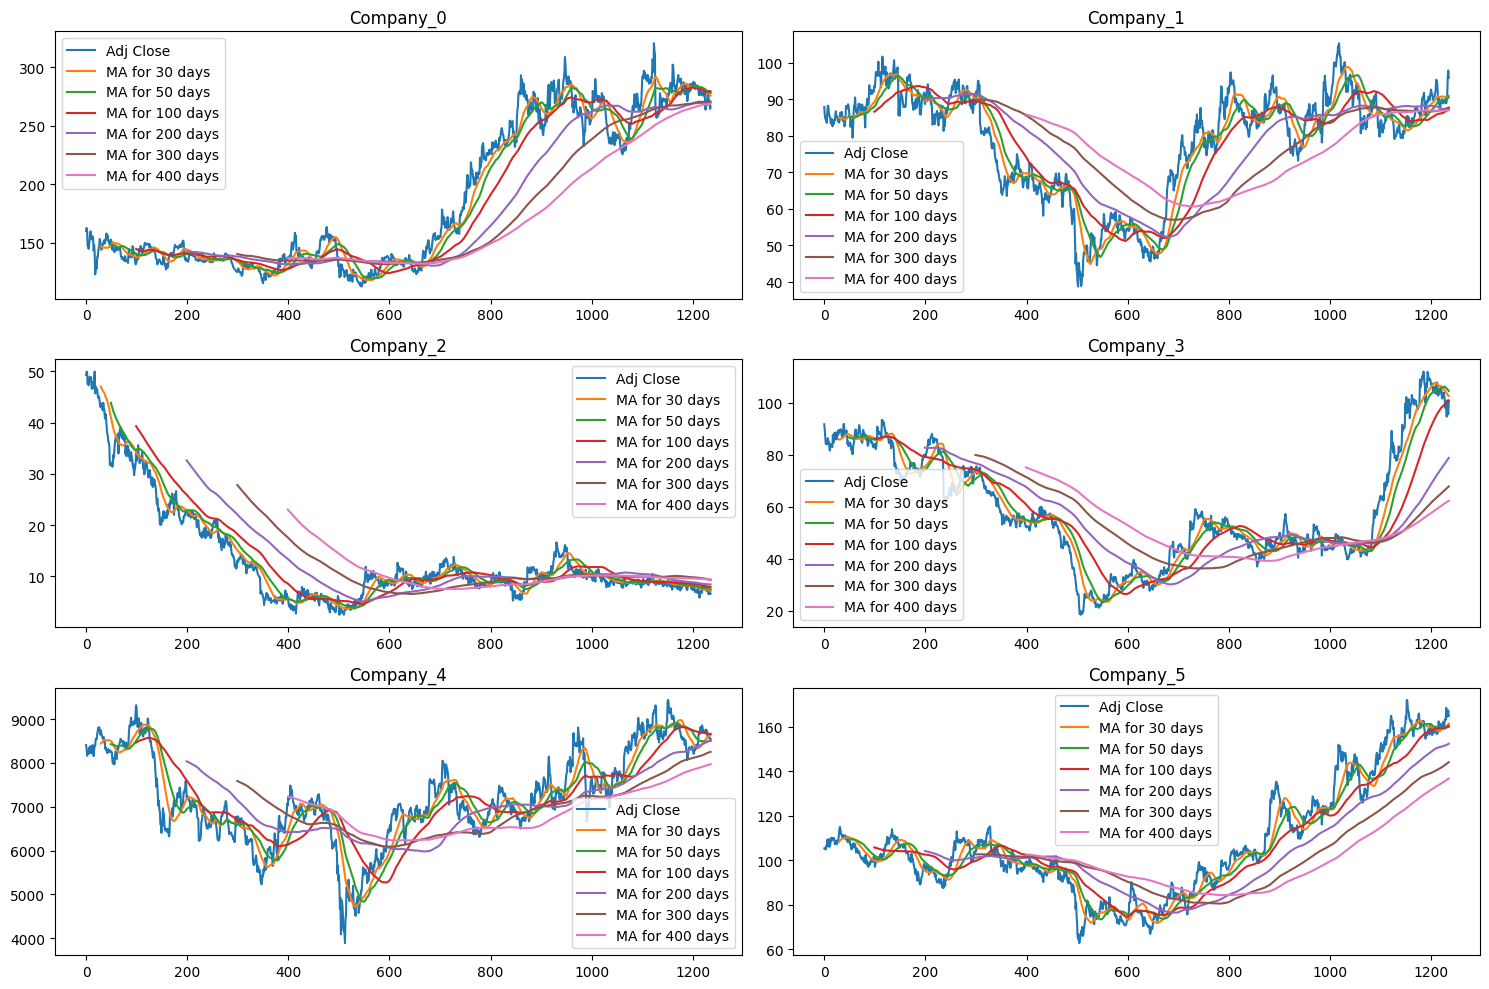

In [ ]:
days=[30,50,100,200,300,400]
for i in days:
    for company in companies:
        column = f"MA for {i} days"
        company_dataframes[company][column] = company_dataframes[company]['Adj Close'].rolling(i).mean()

fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

company_dataframes['Company_0'][['Adj Close','MA for 30 days' ,'MA for 50 days', 'MA for 100 days', 'MA for 200 days','MA for 300 days','MA for 400 days']].plot(ax=axes[0,0])
axes[0,0].set_title('Company_0')

company_dataframes['Company_1'][['Adj Close','MA for 30 days' , 'MA for 50 days', 'MA for 100 days', 'MA for 200 days','MA for 300 days','MA for 400 days']].plot(ax=axes[0,1])
axes[0,1].set_title('Company_1')

company_dataframes['Company_2'][['Adj Close','MA for 30 days' , 'MA for 50 days', 'MA for 100 days', 'MA for 200 days','MA for 300 days','MA for 400 days']].plot(ax=axes[1,0])
axes[1,0].set_title('Company_2')

company_dataframes['Company_3'][['Adj Close','MA for 30 days' , 'MA for 50 days', 'MA for 100 days', 'MA for 200 days','MA for 300 days','MA for 400 days']].plot(ax=axes[1,1])
axes[1,1].set_title('Company_3')

company_dataframes['Company_4'][['Adj Close','MA for 30 days' , 'MA for 50 days', 'MA for 100 days', 'MA for 200 days','MA for 300 days','MA for 400 days']].plot(ax=axes[2,0])
axes[2,0].set_title('Company_4')

company_dataframes['Company_5'][['Adj Close','MA for 30 days' , 'MA for 50 days', 'MA for 100 days', 'MA for 200 days','MA for 300 days','MA for 400 days']].plot(ax=axes[2,1])
axes[2,1].set_title('Company_5')

fig.tight_layout()


In [ ]:
import seaborn as sns

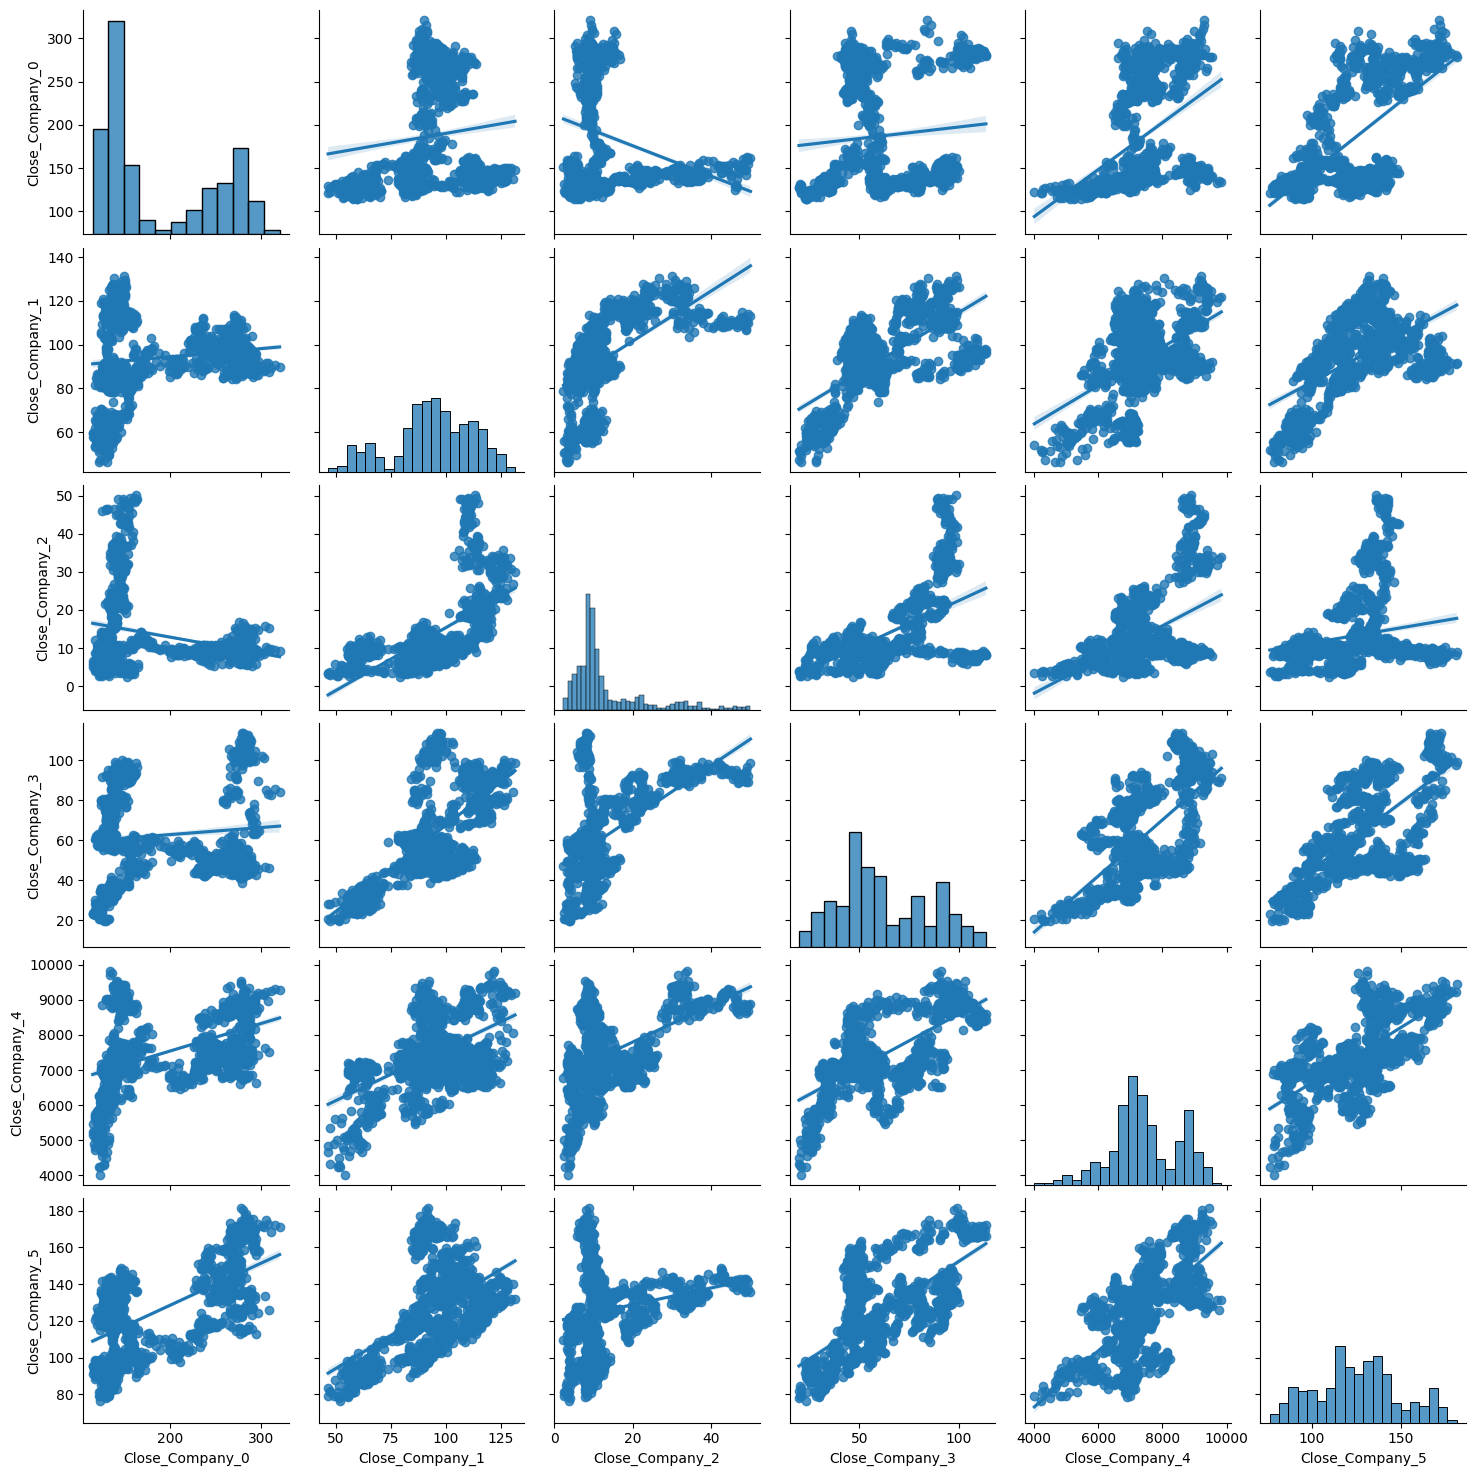

In [ ]:
sns.pairplot(df_closing,kind='reg')

<ipython-input-20-7f9d1431b843>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_closing.corr(),annot=True)


Text(0.5, 1.0, 'Closing price')

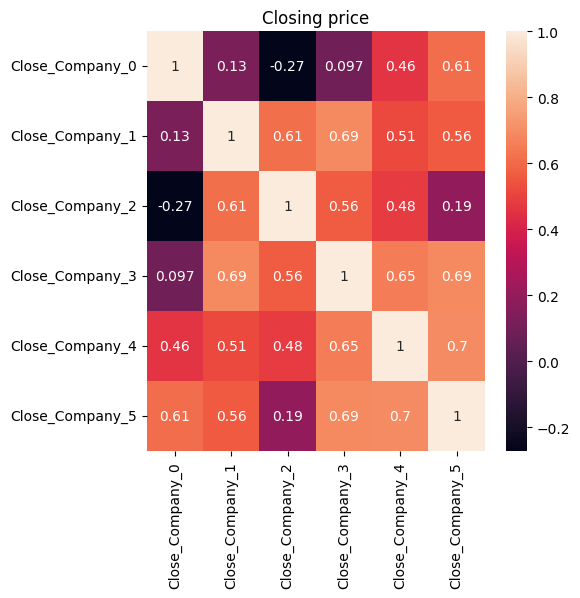

In [ ]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
sns.heatmap(df_closing.corr(),annot=True)
plt.title('Closing price')

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
df = pd.read_csv('/content/train.csv')
output = []

comp_0 = df[df['Company'] == 'Company_0'].reset_index()['Close']
comp_1 = df[df['Company'] == 'Company_1'].reset_index()['Close']
comp_2 = df[df['Company'] == 'Company_2'].reset_index()['Close']
comp_3 = df[df['Company'] == 'Company_3'].reset_index()['Close']
comp_4 = df[df['Company'] == 'Company_4'].reset_index()['Close']
comp_5 = df[df['Company'] == 'Company_5'].reset_index()['Close']

company = pd.DataFrame()
company['company_0'] = comp_0
company['company_1'] = comp_1
company['company_2'] = comp_2
company['company_3'] = comp_3
company['company_4'] = comp_4
company['company_5'] = comp_5

In [ ]:
for i in range(6):
  df1 = company.iloc[:,i]


  if(i==4):
    lst_output = []
    step = 66
    array1 = df1[1236-step-1:1235]
    array2 = df1[1236-step:]
    for i in range(96):
        temp1 = np.array(array1)
        temp2 = np.array(array2)
        c = np.mean(temp2)
        temp1 = temp1 - temp2
        f = np.mean(temp1)
        c = c+f
        lst_output.append(c)
        new = np.zeros(step)
        new[step-1] = c
        new[0:step-1] = array2[1:step]
        array1 = array2
        array2 = new
    lst_output = np.array(lst_output)
    lst_output=lst_output.reshape(96,1)
    output.append(lst_output)
    continue

  from sklearn.preprocessing import MinMaxScaler
  from sklearn.preprocessing import StandardScaler
  scaler=MinMaxScaler(feature_range=(0,1))
  df1=scaler.fit_transform(np.array(df1).reshape(-1,1))


  training_size=int(len(df1)*0.65)
  test_size=len(df1)-training_size
  train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

  def create_dataset(dataset, time_step=1):
      dataX, dataY = [], []
      for i in range(len(dataset)-time_step-1):
          a = dataset[i:(i+time_step), 0]
          c = np.mean(a)
          a = abs(a-c)
          dataX.append(a)
          f = dataset[i + time_step, 0]
          f = abs(f-c)
          dataY.append(f)
      return np.array(dataX), np.array(dataY)

  time_step = 100
  X_train, y_train = create_dataset(train_data, time_step)
  X_test, ytest = create_dataset(test_data, time_step)

  X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
  X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

  model=Sequential()
  model.add(LSTM(128,return_sequences=True,input_shape=(100,1)))
  model.add(LSTM(64,return_sequences=True))
  model.add(LSTM(50))
  model.add(Dense(1))
  model.compile(loss='mean_squared_error',optimizer='adam')



  model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=150,batch_size=64,verbose=1)

  train_predict=model.predict(X_train)
  test_predict=model.predict(X_test)

  train_predict=scaler.inverse_transform(train_predict)
  test_predict=scaler.inverse_transform(test_predict)

  x_input=test_data[333:].reshape(1,-1)
  x_input.shape

  temp_input=list(x_input)
  temp_input=temp_input[0].tolist()

  lst_output=[]
  n_steps=100
  i=0
  while(i<96):

      if(len(temp_input)>100):
          #print(temp_input)
          x_input=np.array(temp_input[1:])
          x_input=x_input.reshape(1,-1)
          x_input = x_input.reshape((1, n_steps, 1))
          #print(x_input)
          yhat = model.predict(x_input, verbose=0)
          temp_input.extend(yhat[0].tolist())
          temp_input=temp_input[1:]
          #print(temp_input)
          lst_output.extend(yhat.tolist())
          i=i+1
      else:
          x_input = x_input.reshape((1, n_steps,1))
          yhat = model.predict(x_input, verbose=0)
          temp_input.extend(yhat[0].tolist())
          lst_output.extend(yhat.tolist())
          i=i+1

  lst_output = np.array(lst_output)
  lst_output = scaler.inverse_transform(lst_output)
  output.append(lst_output)


Epoch 1/150
11/11 [==============================] - 8s 134ms/step - loss: 0.0027 - val_loss: 0.0026
Epoch 2/150
11/11 [==============================] - 0s 24ms/step - loss: 0.0012 - val_loss: 0.0029
Epoch 3/150
11/11 [==============================] - 0s 19ms/step - loss: 7.8711e-04 - val_loss: 0.0025
Epoch 4/150
11/11 [==============================] - 0s 19ms/step - loss: 6.9892e-04 - val_loss: 0.0025
Epoch 5/150
11/11 [==============================] - 0s 19ms/step - loss: 6.7437e-04 - val_loss: 0.0023
Epoch 6/150
11/11 [==============================] - 0s 19ms/step - loss: 6.5566e-04 - val_loss: 0.0023
Epoch 7/150
11/11 [==============================] - 0s 18ms/step - loss: 6.2923e-04 - val_loss: 0.0022
Epoch 8/150
11/11 [==============================] - 0s 19ms/step - loss: 6.0356e-04 - val_loss: 0.0022
Epoch 9/150
11/11 [==============================] - 0s 19ms/step - loss: 5.6439e-04 - val_loss: 0.0023
Epoch 10/150
11/11 [==============================] - 0s 18ms/step - lo

In [ ]:
output = np.array(output)
output = output.flatten()


test = pd.read_csv('/content/test.csv')

submit = pd.DataFrame()
submit['Id']  =  test['Id']
submit['Close'] = output

submit.to_csv('submit.csv', index = False)

In [ ]:
from google.colab import files

files.download('submit.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>